In [41]:
y = [14., 26., 37., 43.]
sigma = [1., 1., 2., 2.]
x = [1., 2., 3., 4.];

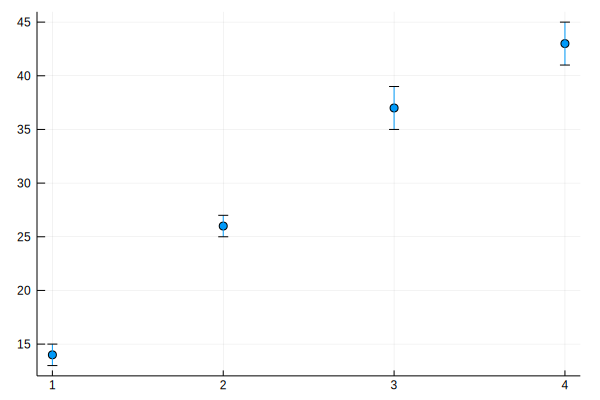

In [4]:
plot(x, y, yerr=sigma, seriestype=:scatter, legend=false)

In [5]:
Y = y
N = length(y)
A = zeros((N, 2))

4×2 Array{Float64,2}:
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0

In [6]:
A[:,1] .= 1.
A[:,2] = x;
A

4×2 Array{Float64,2}:
 1.0  1.0
 1.0  2.0
 1.0  3.0
 1.0  4.0

In [7]:
using LinearAlgebra

In [8]:
W = Diagonal(1. ./ sigma.^2)

4×4 Diagonal{Float64,Array{Float64,1}}:
 1.0   ⋅    ⋅     ⋅  
  ⋅   1.0   ⋅     ⋅  
  ⋅    ⋅   0.25   ⋅  
  ⋅    ⋅    ⋅    0.25

In [9]:
A, W, Y

([1.0 1.0; 1.0 2.0; 1.0 3.0; 1.0 4.0], [1.0 0.0 0.0 0.0; 0.0 1.0 0.0 0.0; 0.0 0.0 0.25 0.0; 0.0 0.0 0.0 0.25], [14.0, 26.0, 37.0, 43.0])

In [10]:
MB = (sqrt(W) * A) \ (sqrt(W) * Y)

2-element Array{Float64,1}:
  4.573033707865167
 10.224719101123595

In [11]:
MBU = A \ Y

2-element Array{Float64,1}:
 5.500000000000001
 9.799999999999999

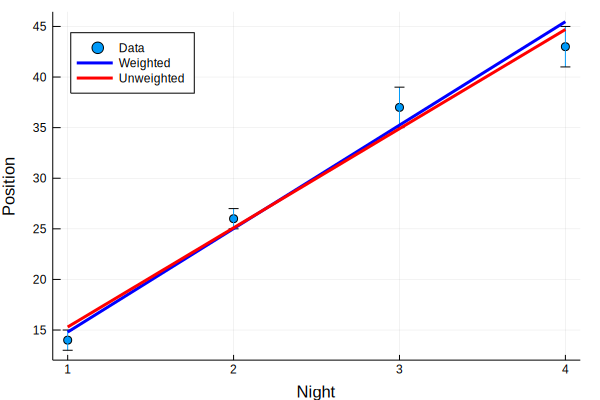

In [13]:
plot(x, y, yerr=sigma, seriestype=:scatter, label="Data", legend=:topleft,
xlabel="Night", ylabel="Position")
plot!(x, A*MB, line=("blue", 1, 3), label="Weighted")
plot!(x, A*MBU, line=("red", 1, 3), label="Unweighted")

In [15]:
C = inv(A' * W * A)

2×2 Array{Float64,2}:
  2.02247   -0.853933
 -0.853933   0.449438

In [21]:
sqrt(C)

2×2 Array{Float64,2}:
  1.34269   -0.468663
 -0.468663   0.479368

In [28]:
dMB = randn((100,2)) * sqrt(C);

In [42]:
angle = collect(range(0, stop=2*pi, length=100))
xx = [sin.(angle) cos.(angle)]
cMB = xx * sqrt(C);

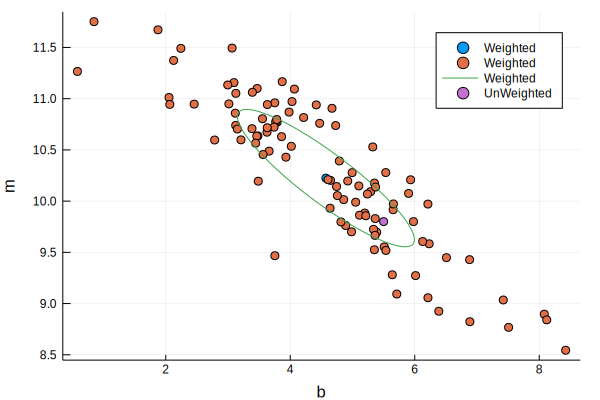

In [39]:
plot([MB[1]], [MB[2]], seriestype=:scatter, label="Weighted", xlabel="b", ylabel="m")
plot!(MB[1] .+ dMB[:,1], MB[2] .+ dMB[:,2], seriestype=:scatter, label="Weighted")
plot!(MB[1] .+ cMB[:,1], MB[2] .+ cMB[:,2], label="Weighted")
plot!([MBU[1]], [MBU[2]], seriestype=:scatter, label="UnWeighted")

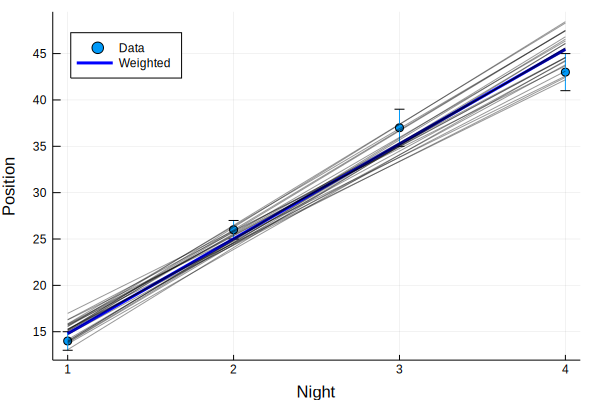

In [49]:
plot(x, y, yerr=sigma, seriestype=:scatter, label="Data", legend=:topleft,
xlabel="Night", ylabel="Position")
plot!(x, A*MB, line=("blue", 1, 3), label="Weighted")
for i in 1:25
    mbi = MB + dMB[i,:]
    plot!(x, A*mbi, line=("black", 0.4, 1), label="")
end
plot!()

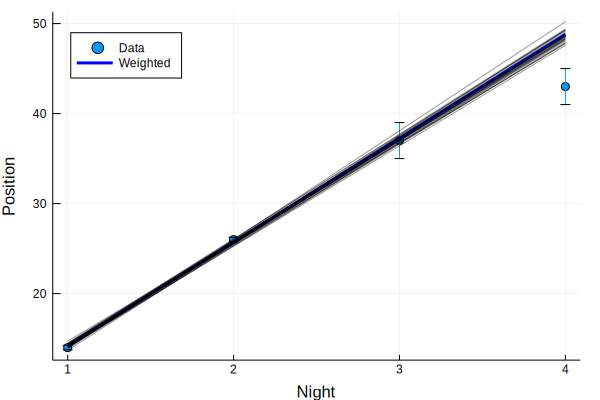

In [57]:
sigma2 = [0.25, 0.25, 2., 2.]
W2 = Diagonal(1. ./ sigma2.^2)
MB2 = (sqrt(W2) * A) \ (sqrt(W2) * Y)
C2 = inv(A' * W2 * A)
dMB2 = randn((100,2)) * real(sqrt(C2));
plot(x, y, yerr=sigma2, seriestype=:scatter, label="Data", legend=:topleft,
xlabel="Night", ylabel="Position")
plot!(x, A*MB2, line=("blue", 1, 3), label="Weighted")
for i in 1:25
    mbi = MB2 + dMB2[i,:]
    plot!(x, A*mbi, line=("black", 0.4, 1), label="")
end
plot!()

In [52]:
C2

2×2 Array{Float64,2}:
  0.770642  -0.40367 
 -0.40367    0.249541

In [53]:
sqrt(C2)

2×2 Array{Complex{Float64},2}:
 0.806894+0.0im  -0.34578+0.0im
 -0.34578+0.0im  0.360524+0.0im

In [55]:
real(C2)

2×2 Array{Float64,2}:
  0.770642  -0.40367 
 -0.40367    0.249541

In [67]:
function line_log_likelihood(x, y, sigma, m, b)
    #return -0.5 * sum((y .- (m.*x .+ b)).^2 ./ sigma.^2)
    return -0.5 * sum(@. (y - (m*x + b))^2 / sigma^2)
end

line_log_likelihood (generic function with 1 method)

In [68]:
bbest, mbest = MB
line_log_likelihood(x, y, sigma, mbest, bbest)

-1.9438202247190999

In [69]:
function line_lnl(b, m)
    return line_log_likelihood(x, y, sigma, m, b)
end

line_lnl (generic function with 1 method)

In [76]:
function line_lnl_2(b, m)
    return line_log_likelihood(x, y, sigma2, m, b)
end

line_lnl_2 (generic function with 1 method)

In [70]:
line_lnl(bbest, mbest)

-1.9438202247190999

In [77]:
line_lnl_2(bbest, mbest)

-13.883600555485403

In [94]:
function make_line_lnl_function(x, y, sigma)
    x = copy(x)
    y = copy(y)
    sigma = copy(sigma)
    function f(b, m)
        return line_log_likelihood(x, y, sigma, m, b)
    end
    return f
end 

make_line_lnl_function (generic function with 1 method)

In [95]:
myf = make_line_lnl_function(x, y, sigma)

(::getfield(Main, Symbol("#f#6"))) (generic function with 1 method)

In [96]:
myf(bbest, mbest)

-1.9438202247190999

In [97]:
myf2 = make_line_lnl_function(x, y, sigma2)

(::getfield(Main, Symbol("#f#6"))) (generic function with 1 method)

In [99]:
myf2(bbest, mbest)

-13.883600555485403

In [103]:
db = sqrt(C[1,1])
dm = sqrt(C[2,2]);

In [106]:
bb = range(MB[1] - 3*db, stop=MB[1] + 3*db, length=100)
mm = range(MB[2] - 3*dm, stop=MB[2] + 3*dm, length=100)

8.213514531661623:0.040630395342666104:12.235923670585567

In [108]:
LL = zeros((length(mm), length(bb)))
for i in 1:length(mm)
    for j in 1:length(bb)
        LL[i,j] = line_log_likelihood(x, y, sigma, mm[i], bb[j])
    end
end

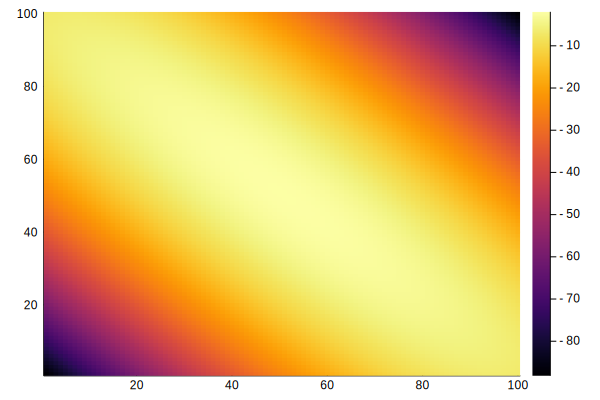

In [109]:
heatmap(LL)